In [1]:
import string
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [77]:
# Radix sort as described in class
# columns is a list of lists, where each inner list represent  column
# returns the sorted list of columns, as well as the list of the original indices of these sorted columns
def radixSort(columns):
    columnsSorted = (list.copy(columns))
    columnsSorted = [(columnsSorted[i], i) for i in range(len(columnsSorted))]  
    for i in reversed(range(len(columnsSorted[0][0]))):
        bucket0 = []
        bucket1 = []
        for (col, x) in columnsSorted:
            if col[i] == '0':
                bucket0.append((col, x))
            else:
                bucket1.append((col, x))
        columnsSorted = list.copy(bucket0 + bucket1)
    columnsSorted.reverse()
    return [x[0] for x in columnsSorted], [x[1] for x in columnsSorted]

# See write up for description
# returns (False, -1) if the dataset does not admit perfect phylogeny
# If the dataset does admit perfect phylogeny, returns (True, relationships)
# relationships is a list of length m where entry i is the label of the rightmost column that is a
#   superset of column i, if one exists
def checkPhylogeny(columnsSorted, labels):
    leastContaining = [-1 for i in range(len(columnsSorted[0]))]
    relationships = [-1 for i in range(len(columnsSorted))] # For each column, who is its superset, if any?
    for i in range(len(columnsSorted)):
        possibleSuperSet = -1
        for j in range(len(columnsSorted[i])):
            if columnsSorted[i][j] == '1':
                if possibleSuperSet == -1:
                    possibleSuperSet = leastContaining[j]
                elif possibleSuperSet != leastContaining[j]:
                    return (False, -1)
        
        for j in range(len(columnsSorted[i])):
            if columnsSorted[i][j] == '1':
                leastContaining[j] = labels[i]
        relationships[i] = possibleSuperSet
    return (True, relationships)


# Check if a perfect phylogeny exists - brute force
# For each column, compare to all columns. If the columns are disjoint or have a subset relationship, continue
# Otherwise, output False
# If all column pairs have been checked, output True
def checkPhylogeny_bf(columns, labels):
    for i in range(len(columns)):
        for j in range(len(columns)):
            if subset(columns[i], columns[j]) or subset(columns[j], columns[i]) or disjoint(columns[i], columns[j]):
                continue
            else:
                return (False, 0)
    return (True, 0)

#is column1 a subset of column2?
def subset(column1, column2):
    for i in range(len(column1)):
        if column1[i] == '1' and column2[i] == '0':
            return False
    return True

# Is column1 disjoin from column2?
def disjoint(column1, column2):
    for i in range(len(column1)):
        if column1[i] == '1' and column2[i] == '1':
            return False
    return True

def difference(column1, column2):
    retList = ['0' for i in range(len(column1))]
    for i in range(len(column1)):
        if column1[i] == '1' and column2[i] == '0':
            retList[i] = '1'
    return retList

# Get the set of individuals that have the mutation for this column
def taxa(column):
    retSet = set()
    for i in range(len(column)):
        if column[i] == '1':
            retSet.add(i + 1)
            
    return retSet
        
x_vals = []
y_vals = []
phylogeny_or_not = []

In [89]:
# Run this cell for every data file to accumulate log(n) and log(t(f(m,n))) into x_vals and y_vals
data1 = open("./a1data6.txt")
data = [line for line in data1.read().splitlines()]
x_vals.append(math.log10(len(data)))
dataTransposed = [[] for col in data[0]]
for i in range(len(data)):
    for j in range(len(data[0])):
        dataTransposed[j].append(data[i][j])
t_start = time.perf_counter()
columnsSorted, labels = radixSort(dataTransposed)
phylogeny_or_not.append(checkPhylogeny(columnsSorted, labels)[0]) # change to checkPhylogeny_bf to test brute force runtime
t_end = time.perf_counter()
t_taken = t_end - t_start
y_vals.append(math.log10(t_taken))



In [90]:
print(x_vals)
print(y_vals)
print(phylogeny_or_not)

[1.0, 2.0, 3.0, 3.0, 3.0, 4.0]
[-3.3378090089692876, -2.300960514119646, -0.5106354623202801, -0.8351557177130434, -0.8739621531621141, 2.436778724760526]
[True, True, True, False, False, False]


Slope is:  1.801145477433275


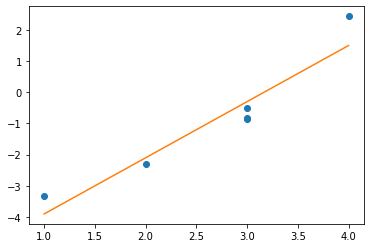

In [91]:
x = np.array(x_vals)
y = np.array(y_vals)
plt.plot(x, y, 'o')
slope, intercept = np.polyfit(x, y, 1)

plt.plot(x, slope*x + intercept)
print("Slope is: ", slope)


In [47]:
# Problem 6
# To build the tree based on the sorted columns

class node:
    
    def __init__(self, individuals, label):
        self.individuals = individuals
        self.label = label
        self.children = set()
        
    def addChild(self, child):
        self.children.add(child)
    
    def __str__(self):
        return self.label
    
    def getChildren(self):
        return str([str(child) for child in self.children])
    
    def getIndividuals(self):
        return str(self.individuals)
        
def find_node(all_nodes, label):
    for i in range(len(all_nodes)):
        if all_nodes[i].label == label:
            return all_nodes[i]
    return -1

In [48]:
data1 = open("./a1globedata.txt")
letterLabels = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o']
data = [line.split() for line in data1.read().splitlines()]
data = data[1:]
data = [line[1:] for line in data]
dataTransposed = [[] for col in data[0]]
for i in range(len(data)):
    for j in range(len(data[0])):
        dataTransposed[j].append(data[i][j])
(columnsSorted, labels) = radixSort(dataTransposed)
labels = [letterLabels[i] for i in labels]
(_, relationships) = checkPhylogeny(columnsSorted, labels) # change to checkPhylogeny_bf to test brute force runtime

print(labels)
for p in columnsSorted:
    print(p)
print(relationships)

['n', 'k', 'i', 'g', 'e', 'b', 'h', 'f', 'd', 'c', 'a', 'l', 'm', 'o', 'j']
['0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1']
['0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0']
['0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0']
['0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0']
['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0']
['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0']
['0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0

In [49]:
root_node = node(set([i in range(len(columnsSorted))]), 'root')
print(root_node.children)
all_nodes = [root_node]
for i in range(len(columnsSorted)):
    if relationships[i] == -1:
        new_node = node(taxa(columnsSorted[i]), labels[i])
        all_nodes.append(new_node)
        if(root_node.label == 'root'):
            root_node = new_node
            continue
        new_node.addChild(root_node)
        root_node = new_node
    else:
        new_node = node(taxa(columnsSorted[i]), labels[i])
        all_nodes.append(new_node)
        parent_node = find_node(all_nodes, relationships[i])
        parent_node.addChild(new_node)
        parent_node.individuals = parent_node.individuals.difference(new_node.individuals)
        
        
        

set()


In [46]:
# For each node, print its label, its child node, and its individuals
curr_node = root_node
def print_tree(node):
    print(node.label + "\'s children are: " +node.getChildren())
    print(node.label + "\'s individuals are: " + node.getIndividuals())
    for node in node.children:
        print_tree(node)
print("the root node is: " + root_node.label)
print_tree(root_node)

the root node is: j
j's children are: ['o']
j's individuals are: set()
o's children are: ['n']
o's individuals are: {14}
n's children are: ['l', 'k']
n's individuals are: {7}
l's children are: ['m']
l's individuals are: {16}
m's children are: []
m's individuals are: {9}
k's children are: ['h', 'i']
k's individuals are: {13}
h's children are: ['f']
h's individuals are: {11}
f's children are: ['d']
f's individuals are: {4}
d's children are: ['c', 'a']
d's individuals are: {10}
c's children are: []
c's individuals are: {5}
a's children are: []
a's individuals are: {6}
i's children are: ['g']
i's individuals are: {8}
g's children are: ['e']
g's individuals are: {2}
e's children are: ['b']
e's individuals are: {12, 15}
b's children are: []
b's individuals are: {3}
